In [60]:
#XGBM AND LGBM

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
#exploratory data analysis

In [63]:
df=pd.read_csv("/content/diabetes (1).csv")

In [64]:
df.shape

(768, 9)

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
#null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [69]:
#duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

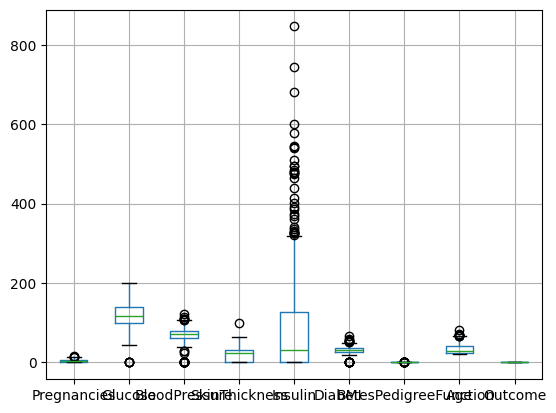

In [70]:
#outliers
df.boxplot()

In [71]:
#outlier capping
# Outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

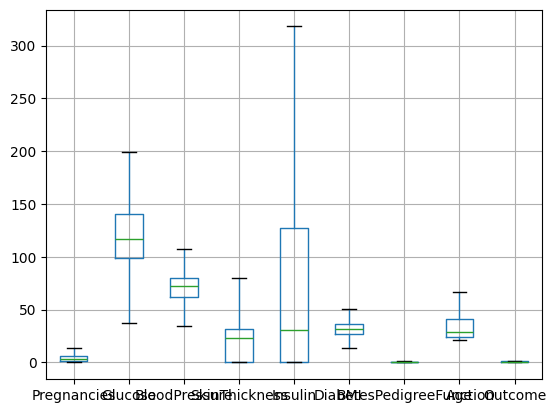

In [72]:
df.boxplot()

In [73]:
target=[['Outcome']]
features=df.drop(columns=['Outcome'])


<Figure size 1000x1000 with 0 Axes>

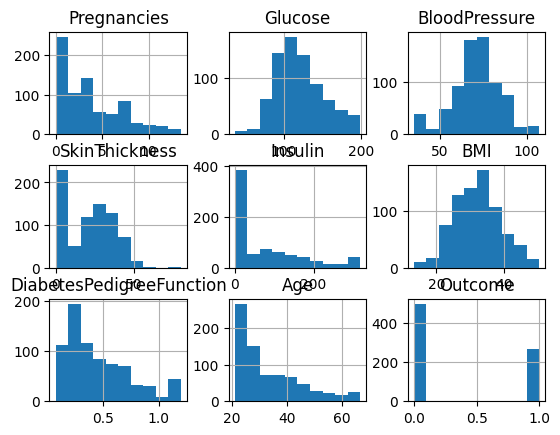

<Figure size 1000x1000 with 0 Axes>

In [74]:
df.hist()
plt.figure(figsize=(10,10))

<Axes: >

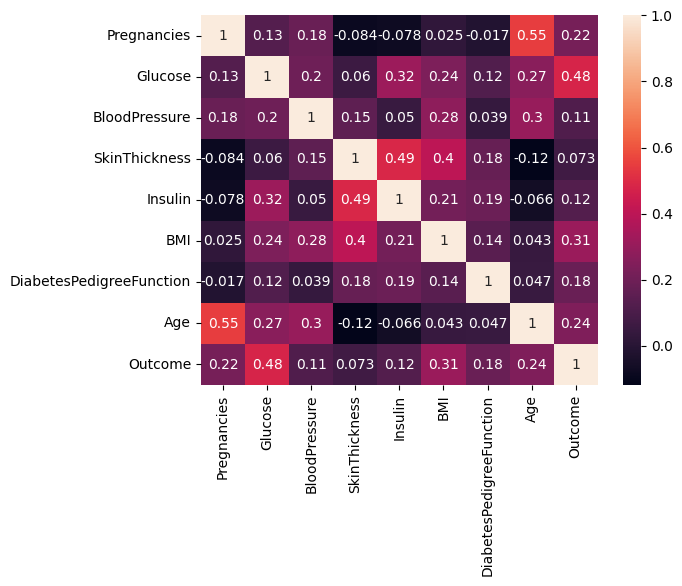

In [75]:
corr=df.corr()
#heatmap
sns.heatmap(corr,annot=True)

In [76]:
sns.pairplot(data=df,hue='Outcome')

Output hidden; open in https://colab.research.google.com to view.

In [77]:
#data preprocessing

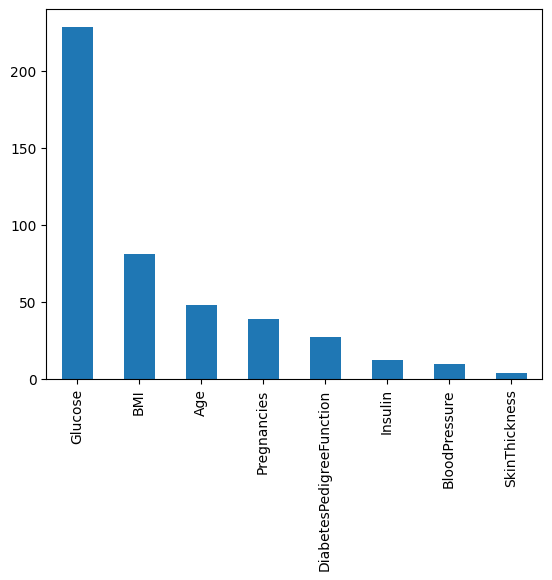

In [78]:
#feature selection
from sklearn.feature_selection import f_classif
target=df['Outcome'].values.reshape(-1,1)
f_c=f_classif(features,target)
pd.Series(f_c[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [79]:
std_sca=StandardScaler()
features[['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]=std_sca.fit_transform(features[['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']])


In [80]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,0.861926,0.092691,35.0,-0.787602,0.209359,0.588927,1.445691
1,1.0,-1.159433,-0.330201,29.0,-0.787602,-0.784254,-0.378101,-0.189304
2,8.0,1.984903,-0.471166,0.0,-0.787602,-1.252672,0.746595,-0.103252
3,1.0,-1.031093,-0.330201,23.0,0.217583,-0.571337,-1.022787,-1.049828
4,0.0,0.508990,-2.162737,35.0,1.008900,1.557835,2.596563,-0.017199


In [81]:
features.drop(columns=['SkinThickness'],inplace=True)

In [82]:
features.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,0.861926,0.092691,-0.787602,0.209359,0.588927,1.445691
1,1.0,-1.159433,-0.330201,-0.787602,-0.784254,-0.378101,-0.189304
2,8.0,1.984903,-0.471166,-0.787602,-1.252672,0.746595,-0.103252
3,1.0,-1.031093,-0.330201,0.217583,-0.571337,-1.022787,-1.049828
4,0.0,0.508990,-2.162737,1.008900,1.557835,2.596563,-0.017199


In [83]:
#building predicting models:

In [84]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 7)
(154, 7)
(614, 1)
(154, 1)


In [85]:
#predictive model using lgbm and xgbm

In [86]:
#xgbm
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(  accuracy_score(y_test,y_pred))

0.6883116883116883


In [87]:
#confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[80, 21],
       [27, 26]])

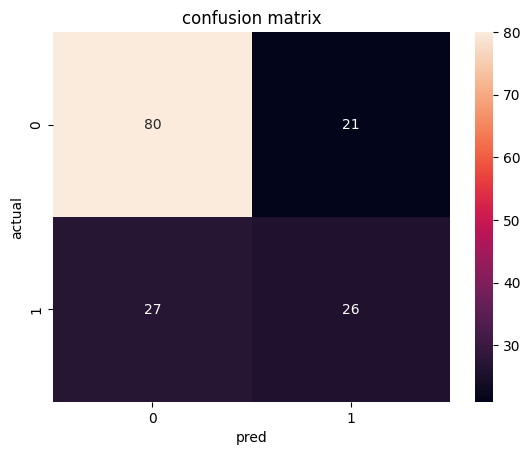

In [89]:
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True)
plt.xlabel('pred')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       101
           1       0.55      0.49      0.52        53

    accuracy                           0.69       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154



In [91]:
#lgbm
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)
y_pred1=lgbm.predict(x_test)
print(accuracy_score(y_test,y_pred1))

[LightGBM] [Info] Number of positive: 215, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350163 -> initscore=-0.618323
[LightGBM] [Info] Start training from score -0.618323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [92]:
confusion_matrix(y_test,y_pred1)

array([[83, 18],
       [26, 27]])

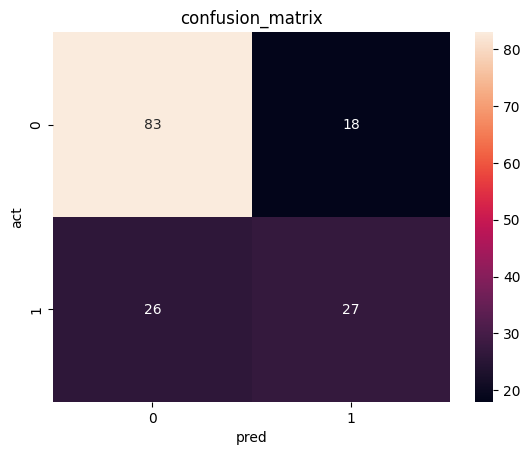

In [93]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)
plt.xlabel('pred')
plt.ylabel('act')
plt.title('confusion_matrix')
plt.show();

In [94]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       101
           1       0.60      0.51      0.55        53

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [95]:
#cross validation and hyperparameter tuning

In [96]:
from sklearn.model_selection import train_test_split,ShuffleSplit,StratifiedShuffleSplit,KFold,cross_validate,cross_val_score,GridSearchCV

In [99]:
# XGBoost: Cross-Validation + Hyperparameter Tuning
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_params = {'n_estimators': [100, 200],'max_depth': [3, 4, 5],'learning_rate': [0.01, 0.1, 0.2],'subsample': [0.8, 1]}
# Perform Grid Search with 5-fold Cross-Validation
xgb_rid = GridSearchCV(estimator=xgb,param_grid=xgb_params,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
xgb_rid.fit(x_train, y_train)
# Best parameters and CV accuracy
print("Best XGBoost Parameters:", xgb_rid.best_params_)
print("Best XGBoost CV Accuracy:", xgb_rid.best_score_)
# Best model
xgb_best = xgb_rid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
Best XGBoost CV Accuracy: 0.7963614554178328


In [100]:
# LightGBM: Cross-Validation + Hyperparameter Tuning
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42)

# Define parameter grid
lgbm_params = {'n_estimators': [100, 200],'max_depth': [3, 4, 5],'learning_rate': [0.01, 0.1, 0.2],'subsample': [0.8, 1]}
# Perform Grid Search with 5-fold Cross-Validation
lgbm_grid = GridSearchCV(estimator=lgbm,param_grid=lgbm_params,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
lgbm_grid.fit(x_train, y_train)
# Best parameters and CV accuracy
print("Best LightGBM Parameters:", lgbm_grid.best_params_)
print("Best LightGBM CV Accuracy:", lgbm_grid.best_score_)
# Best model
lgbm_best = lgbm_grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 215, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350163 -> initscore=-0.618323
[LightGBM] [Info] Start training from score -0.618323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

comparitive analysis

1. Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

The comparison between the XGBoost (XGBM) and LightGBM (LGBM) models shows that LightGBM outperforms XGBoost across all major performance metrics. LightGBM achieves a higher overall accuracy of 71%, compared to 69% for XGBoost. In terms of class-wise metrics, LightGBM demonstrates better precision, recall, and F1-score for both classes. Notably, for class 1-the minority class-LightGBM shows an improvement in precision (0.60 vs. 0.55), recall (0.51 vs. 0.49), and F1-score (0.55 vs. 0.52), indicating its stronger ability to correctly identify positive cases.




2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.



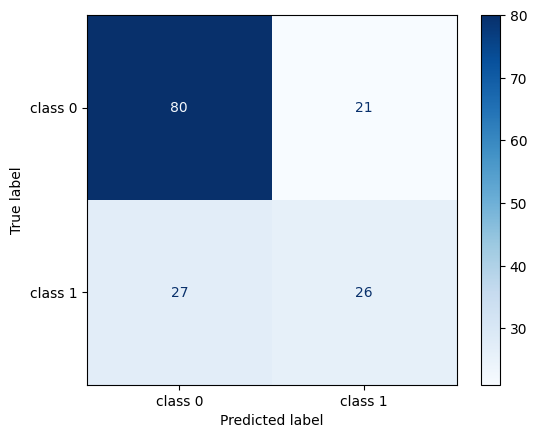

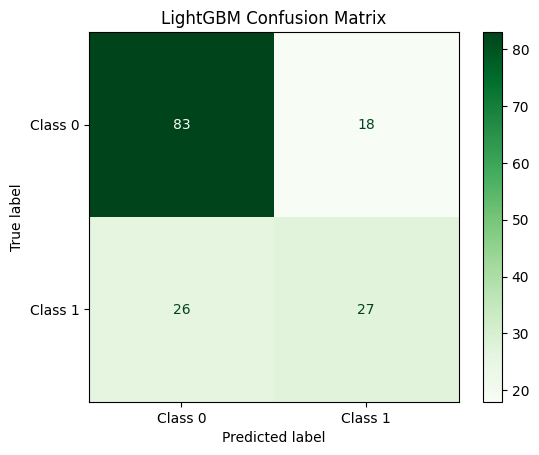

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['class 0','class 1'],cmap='Blues')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1, display_labels=["Class 0", "Class 1"], cmap='Greens')
plt.title("LightGBM Confusion Matrix")
plt.show()

Interpretation

The confusion matrices for XGBoost and LightGBM reveal that LightGBM performs slightly better in classifying both the majority and minority classes. LightGBM correctly predicted 83 instances of class 0, compared to 80 by XGBoost, and misclassified fewer instances as class 1 (18 vs. 21). For class 1, which is often more challenging due to class imbalance, LightGBM correctly identified 27 instances, while XGBoost identified 26. Additionally, LightGBM had one fewer false negative (26 vs. 27). These small but consistent improvements suggest that LightGBM is more effective at distinguishing between the two classes, resulting in better overall precision and recall. In summary, the confusion matrices confirm that LightGBM has a slight edge over XGBoost in terms of both accuracy and robustness, particularly in handling the minority class.

